In [1]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white',color_codes=True,font_scale=1.5)

#model building
from  sklearn.naive_bayes import GaussianNB

#preprocessing
from sklearn.preprocessing import Imputer ,LabelEncoder ,StandardScaler

#model validation
from sklearn.metrics import confusion_matrix, accuracy_score ,classification_report

In [2]:
# read the dataset
df = pd.read_csv('run_or_walk.csv')
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [3]:
df.dtypes

date               object
time               object
username           object
wrist               int64
activity            int64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
date              88588 non-null object
time              88588 non-null object
username          88588 non-null object
wrist             88588 non-null int64
activity          88588 non-null int64
acceleration_x    88588 non-null float64
acceleration_y    88588 non-null float64
acceleration_z    88588 non-null float64
gyro_x            88588 non-null float64
gyro_y            88588 non-null float64
gyro_z            88588 non-null float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [5]:
# check for null value
df.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000080C7A20B38>,
      dtype=object)

<Figure size 1080x432 with 0 Axes>

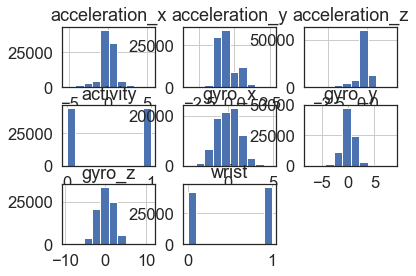

In [6]:
plt.figure(figsize=(15,6))
df.hist()

In [7]:
# chek the correlation between dependent and independent variable
df.corr()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
wrist,1.000000,-0.113404,-0.609579,0.087091,0.323680,-0.022092,-0.068403,0.008796
activity,-0.113404,1.000000,-0.017747,0.639520,-0.192435,0.040856,0.012055,-0.008106
acceleration_x,-0.609579,-0.017747,1.000000,-0.265169,-0.552374,-0.021705,-0.004091,-0.060849
acceleration_y,0.087091,0.639520,-0.265169,1.000000,0.106220,0.010549,0.072170,-0.022994
acceleration_z,0.323680,-0.192435,-0.552374,0.106220,1.000000,0.035296,-0.021004,0.049621
gyro_x,-0.022092,0.040856,-0.021705,0.010549,0.035296,1.000000,0.094011,0.317769
gyro_y,-0.068403,0.012055,-0.004091,0.072170,-0.021004,0.094011,1.000000,0.287244
gyro_z,0.008796,-0.008106,-0.060849,-0.022994,0.049621,0.317769,0.287244,1.000000


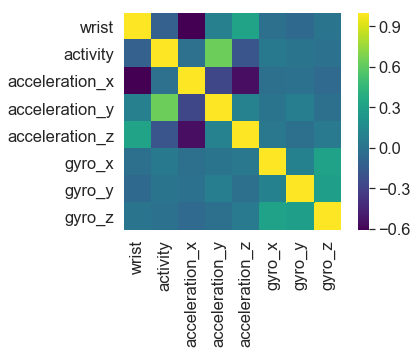

In [8]:
#here acceleration_y is most correlated to activity
#plot heatmap
sns.heatmap(df.corr(),square=True ,cmap='viridis')

In [9]:
# standardizing the column
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [10]:
df.activity.value_counts()

1    44365
0    44223
Name: activity, dtype: int64

In [11]:
# seperate the depdent and independent variable
X =df.drop(['date','time','activity','username'],axis=1)
y =df.activity

In [12]:
display(X.shape)
display(y.shape)

(88588, 7)

(88588,)

In [13]:
# model building
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.3,random_state=100)
display(X_train.shape)
display(X_test.shape)
display(y_train.shape)
display(y_test.shape)

(62011, 7)

(26577, 7)

(62011,)

(26577,)

In [14]:
# instantiate the algorithm 
NB = GaussianNB()
# fit the training data 
NB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [15]:
NB.classes_

array([0, 1], dtype=int64)

In [16]:
NB.class_count_

array([30826., 31185.])

In [17]:
# Now predict 
y_predict = NB.predict(X_test)

In [18]:
#modelvalidation
model_accuracy = accuracy_score(y_test, y_predict) 

In [19]:
model_accuracy

0.9552996952251948

In [20]:
# classification for each class
model_classification = classification_report(y_test,y_predict)

In [21]:
print(model_classification)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96     13397
           1       0.99      0.92      0.95     13180

    accuracy                           0.96     26577
   macro avg       0.96      0.96      0.96     26577
weighted avg       0.96      0.96      0.96     26577



In [22]:
# now see the confusion matrix
model_confusion_matrix = confusion_matrix(y_test,y_predict)

In [23]:
model_confusion_matrix

array([[13244,   153],
       [ 1035, 12145]], dtype=int64)

In [24]:
# now build the model acceleration as  predictors
X_acc = X[['acceleration_x','acceleration_y','acceleration_z']]
y_acc =df.activity

In [25]:
# model building
X_train_acc,X_test_acc,y_train_acc,y_test_acc =train_test_split(X_acc,y_acc,test_size=0.3,random_state=100)

In [26]:
# instantiate the algorithm 
NB = GaussianNB()
# fit the training data 
NB.fit(X_train_acc,y_train_acc)
y_predict_acc = NB.predict(X_test_acc)

In [27]:
# accuracy
print('accuracy of model ',accuracy_score(y_test_acc,y_predict_acc))
print()
print('Classification report ' ,classification_report(y_test_acc,y_predict_acc))


accuracy of model  0.9570305151070474

Classification report                precision    recall  f1-score   support

           0       0.93      0.99      0.96     13397
           1       0.99      0.92      0.96     13180

    accuracy                           0.96     26577
   macro avg       0.96      0.96      0.96     26577
weighted avg       0.96      0.96      0.96     26577



In [28]:
# now use  gyro only predictor
X_gyro =X[['gyro_x','gyro_y','gyro_z']]
y_gyro=df.activity

In [29]:
# model building
X_train_gyro,X_test_gyro,y_train_gyro,y_test_gyro =train_test_split(X_gyro,y_gyro,test_size=0.3,random_state=100)
# instantiate the algorithm 
NB = GaussianNB()
# fit the training data 
NB.fit(X_train_gyro,y_train_gyro)
y_predict_gyro = NB.predict(X_test_gyro)

In [30]:
# accuracy
print('accuracy of model ',accuracy_score(y_test_gyro,y_predict_gyro))
print()
print('Classification report ' ,classification_report(y_test_gyro,y_predict_gyro))

accuracy of model  0.6478910336004816

Classification report                precision    recall  f1-score   support

           0       0.63      0.73      0.68     13397
           1       0.67      0.56      0.61     13180

    accuracy                           0.65     26577
   macro avg       0.65      0.65      0.64     26577
weighted avg       0.65      0.65      0.65     26577



# Conclusion using gyro as predictor  accuracy falls abruptly and in case of accelaration as predictors accuracy remain almost same as we use all column as predictor

# acceleration is itself most predictor

In [31]:
# use only one predictor
X_one= X[['acceleration_y']]
y_one =df.activity

In [32]:
# model building
X_train_one,X_test_one,y_train_one,y_test_one =train_test_split(X_one,y_one,test_size=0.3,random_state=100)
# instantiate the algorithm 
NB = GaussianNB()
# fit the training data 
NB.fit(X_train_one,y_train_one)
y_predict_one = NB.predict(X_test_one)

In [33]:
# accuracy
print('accuracy of model ',accuracy_score(y_test_one,y_predict_one))
print()
print('Classification report ' ,classification_report(y_test_one,y_predict_one))

accuracy of model  0.850660345411446

Classification report                precision    recall  f1-score   support

           0       0.79      0.96      0.87     13397
           1       0.95      0.74      0.83     13180

    accuracy                           0.85     26577
   macro avg       0.87      0.85      0.85     26577
weighted avg       0.87      0.85      0.85     26577



In [34]:
# by using one column predictor is giving significant accuracny 
# acceleration_y is most predictor

In [35]:
# As response taget is binary we can use Logistic regression as well
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
# fit the training data 
LR.fit(X_train,y_train)
y_predict_lr =LR.predict(X_test)

In [36]:
# accuracy
print('accuracy of model',accuracy_score(y_test,y_predict_lr))
print()
print('Classification report' ,classification_report(y_test,y_predict_lr))

accuracy of model 0.8634909884486586

Classification report               precision    recall  f1-score   support

           0       0.83      0.91      0.87     13397
           1       0.90      0.82      0.86     13180

    accuracy                           0.86     26577
   macro avg       0.87      0.86      0.86     26577
weighted avg       0.87      0.86      0.86     26577



# in LR accuracy is decrease with all predictor but in Naves Baiyes accuracy is quite high